In [264]:
import warnings
warnings.filterwarnings('ignore')
from plotnine import *

from sklearn.decomposition import PCA
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, silhouette_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.mixture import GaussianMixture
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.decomposition import PCA


import numpy as np

# Data Cleaning

In [325]:
data = pd.read_csv("https://raw.githubusercontent.com/jacksonjthomas/Parlett-Data-Science/main/ParlettFinalProject.csv")
data.head()

,Name,Age,Nationality,Division,Position,G,PA,AB,R,H,...,BA,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SF,IBB
0,Whit Merrifield,30.0,USA,AL Central,2B,162,735,681,105,206,...,0.302,0.348,0.463,0.811,111,315,8,5,4,5
1,Rafael Devers,22.0,DR,AL East,3B,156,702,647,129,201,...,0.311,0.361,0.555,0.916,133,359,8,4,2,7
2,DJ LeMahieu,30.0,USA,AL East,2B,145,655,602,109,197,...,0.327,0.375,0.518,0.893,135,312,14,2,4,0
3,Xander Bogaerts,26.0,NED,AL East,SS,155,698,614,110,190,...,0.309,0.384,0.555,0.939,140,341,11,2,6,2
4,Ozzie Albies,22.0,NED,NL East,2B,160,702,640,102,189,...,0.295,0.352,0.500,0.852,112,320,2,4,4,6


In [329]:
getting dummy variables
NationalityDUM = pd.get_dummies(data["Nationality"])
DivisionDUM = pd.get_dummies(data["Division"])
PositionDUM = pd.get_dummies(data["Position"])

data = pd.concat([data, NationalityDUM], axis = 1)
data = pd.concat([data, DivisionDUM], axis = 1)
data = pd.concat([data, PositionDUM], axis = 1)


data.columns

Index(['Name', 'Age', 'Nationality', 'Division', 'Position', 'G', 'PA', 'AB',
       'R', 'H', 'Singles', 'Doubles', 'Triples', 'HR', 'XBH', 'RBI', 'SB',
       'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'OPS', 'OPS+', 'TB', 'GDP', 'HBP',
       'SF', 'IBB', 'CAN', 'COL', 'CUB', 'DR', 'GER', 'JPN', 'KOR', 'MEX',
       'NED', 'PR', 'USA', 'VEN', 'AL Central', 'AL East', 'AL West',
       'Multiple', 'NL Central', 'NL East', 'NL West', '1B', '2B', '3B', 'C',
       'DH', 'INF', 'OF', 'SS', 'UTIL', 'BB/SO', 'ISO'],
      dtype='object')

In [327]:
data["BB/SO"] = data["BB"]/data["SO"]
data["ISO"] = data["SLG"]-data["BA"]
predictors = ['G', 'PA', 'AB', 'R', 'H', 'Singles', 'Doubles', 'Triples', 'HR', 'XBH', 'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 
              'OBP', 'SLG', 'OPS', 'OPS+', 'TB', 'GDP', 'HBP', 'SF', 'IBB', "BB/SO", "ISO"]
reverseZscore = ["SO", "CS" , "GDP"]


In [328]:
#z-score variables
X = data[predictors]
z = StandardScaler()
zScored = z.fit_transform(X)
data[predictors] = zScored
data[reverseZscore] = data[reverseZscore]*-1
data.head()

,Name,Age,Nationality,Division,Position,G,PA,AB,R,H,...,2B,3B,C,DH,INF,OF,SS,UTIL,BB/SO,ISO
0,Whit Merrifield,30.0,USA,AL Central,2B,1.428887,1.947192,2.317631,1.426081,2.647051,...,1,0,0,0,0,0,0,0,-0.452880,-0.727590
1,Rafael Devers,22.0,DR,AL East,3B,1.098570,1.594704,1.897632,2.583620,2.463202,...,0,1,0,0,0,0,0,0,-0.221719,0.717702
2,DJ LeMahieu,30.0,USA,AL East,2B,0.492987,1.092675,1.341750,1.619004,2.316123,...,1,0,0,0,0,0,0,0,0.317190,-0.205195
3,Xander Bogaerts,26.0,NED,AL East,SS,1.043517,1.551978,1.489986,1.667235,2.058735,...,0,0,0,0,0,0,1,0,0.876554,0.752528
4,Ozzie Albies,22.0,NED,NL East,2B,1.318781,1.594704,1.811161,1.281388,2.021965,...,1,0,0,0,0,0,0,0,0.172306,0.038589


# Question 1 - What poistional groups have the best plate approach? 

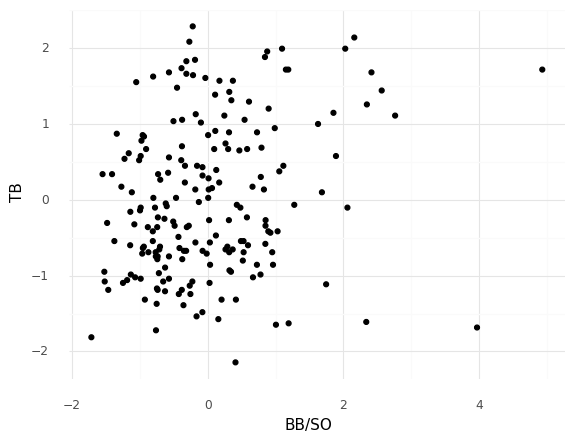

<ggplot: (8779711303927)>

In [485]:
(ggplot(data, aes(x = "BB/SO", y = "TB")) + 
geom_point() + 
theme_minimal())

In [184]:
kValuesEM = {}
Q1predictors = ["BB/SO" , "TB"]
q1 = data[Q1predictors]
em = GaussianMixture()

for k in range(2,10):
    #EM LOOP
    em = GaussianMixture(n_components = k)
    em.fit(q1)
    cluster = em.predict(q1)
    kValuesEM["K of " + str(k)] = (silhouette_score(X, cluster).round(4))

max_key = max(kValuesEM, key=kValuesEM.get)

print(max_key)

K of 2


In [185]:
em = GaussianMixture(n_components = 2)
em.fit(q1)

cluster = em.predict(q1)
q1["clusters"] = cluster


In [188]:
q1["Cluster Tier"] = q1["clusters"]
q1["Position"] = data["Position"]
q1["Cluster Tier"].replace({1 : "Upper Tier", 0 : "Lower Tier"}, inplace =True)

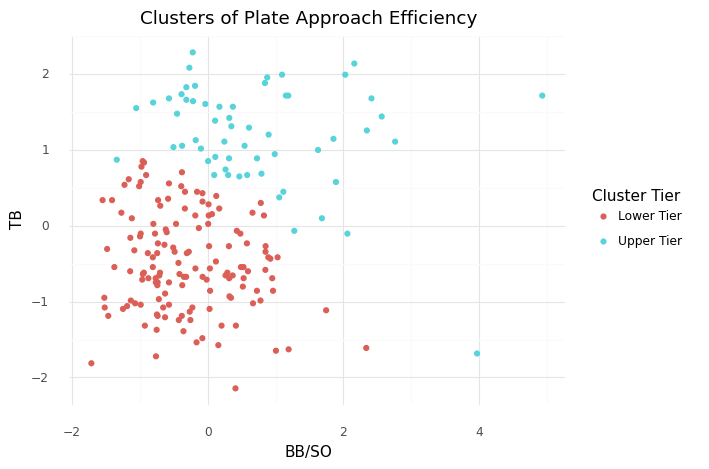

<ggplot: (8779710894041)>

In [187]:
(ggplot(q1, aes(x = "BB/SO", y = "TB", color = "Cluster Tier")) + 
geom_point() + 
ggtitle("Clusters of Plate Approach Efficiency") + 
theme_minimal())

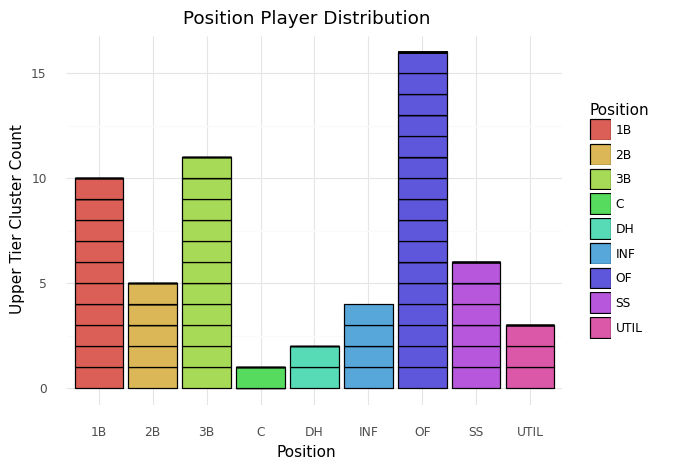

<ggplot: (8779710755877)>

In [202]:
(ggplot(q1, aes(x = "Position", y = "clusters", fill = "Position")) + 
labs(y = "Upper Tier Cluster Count") +
geom_col(color = "black") + 
ggtitle("Position Player Distribution") + 
theme_minimal())

### Answer 

I can conclude that based on my findings OF, 1B, and 3B are the top three positional groups in baseball that have hitters with the best plate approach. I was able to come to this conclusion by classifying my player population into two separate clusters, Upper Tier and Lower Tier. Such clusters were based upon the relationship between BB/SO (Walk to Strikeout ratio) and the Total Bases of the hitter. The meaning behind using BB/SO is to show the hitter's patience at the plate and how willing they are to work walks and employ plate discipline. With Total Bases, I want to show how many bases the hitter is able to get across all of their Plate Appearances. The more TB they have the likelier they are to have more hits and extra-base hits. By showcasing the relationship between these two statistics, we are able to thoroughly evaluate how well-rounded a hitter is. After classifying every hitter in a cluster, I made a bar graph to show the distribution of each position with an Upper Tier classification. This shows how each position compares to one another with plate approach and execution. From here, we are able to see that OF has the most hitters here but, it is crucial to remember that 3 OF are used in an MLB team's starting lineup so it's likelier for a positional group with a larger population to hold more hitters that are above average. After evaluating the bar graph we can determine that it's important for a team's 3B, 1B, and OF to be able to produce at the plate across an MLB season.

# Question 2 - Can we predict a player’s division their team plays in?

In [ ]:
divPredictors = data[predictors]

In [220]:
#NL WEST
NLWy = data["NL West"]
NLWX_train, NLWX_test, NLWy_train, NLWy_test = train_test_split(divPredictors,NLWy, test_size = 0.2)

In [221]:
#NL CENTRAL
NLCy = data["NL Central"]
NLCX_train, NLCX_test, NLCy_train, NLCy_test = train_test_split(divPredictors,NLCy, test_size = 0.2)

In [222]:
#NL EAST
NLEy = data["NL East"]
NLEX_train, NLEX_test, NLEy_train, NLEy_test = train_test_split(divPredictors,NLEy, test_size = 0.2)

In [223]:
#AL WEST
ALWy = data["AL West"]
ALWX_train, ALWX_test, ALWy_train, ALWy_test = train_test_split(divPredictors,ALWy, test_size = 0.2)

In [224]:
#AL CENTRAL
ALCy = data["AL Central"]
ALCX_train, ALCX_test, ALCy_train, ALCy_test = train_test_split(divPredictors,ALCy, test_size = 0.2)

In [225]:
#AL EAST
ALEy = data["AL East"]
ALEX_train, ALEX_test, ALEy_train, ALEy_test = train_test_split(divPredictors,ALEy, test_size = 0.2)

In [226]:
#Multiple
MULy = data["Multiple"]
MULX_train, MULX_test, MULy_train, MULy_test = train_test_split(divPredictors,MULy, test_size = 0.2)

In [269]:
divisions = ['NL_West', 'NL_Central', 'NL_East','AL_West','AL_Central', 'AL_East', 'Multiple']
Xtrains = [NLWX_train, NLCX_train, NLEX_train, ALWX_train, ALCX_train, ALEX_train, MULX_train]
Xtests = [NLWX_test, NLCX_test, NLEX_test, ALWX_test, ALCX_test, ALEX_test, MULX_test]
ytrains = [NLWy_train, NLCy_train, NLEy_train, ALWy_train, ALCy_train, ALEy_train, MULy_train]
ytests = [NLWy_test, NLCy_test, NLEy_test, ALWy_test, ALCy_test, ALEy_test, MULy_test]

iterator = 0
for i in divisions:
    title = i + "_depthvalues"
    print(title)
    title = {}
    for j in range(2,6):
        tree = DecisionTreeClassifier(max_depth = j)
        tree.fit(Xtrains[iterator], ytrains[iterator])
        y_pred = tree.predict(Xtests[iterator])
        acc = accuracy_score(y_pred, ytests[iterator])
        title["Max Depth of " + str(j)] = acc
    iterator+=1
    max_key = max(title, key=title.get)
    print(title)
    print(max_key)
    print("")


NL_West_depthvalues
{'Max Depth of 2': 0.85, 'Max Depth of 3': 0.825, 'Max Depth of 4': 0.8, 'Max Depth of 5': 0.65}
Max Depth of 2

NL_Central_depthvalues
{'Max Depth of 2': 0.8, 'Max Depth of 3': 0.725, 'Max Depth of 4': 0.7, 'Max Depth of 5': 0.725}
Max Depth of 2

NL_East_depthvalues
{'Max Depth of 2': 0.775, 'Max Depth of 3': 0.725, 'Max Depth of 4': 0.725, 'Max Depth of 5': 0.725}
Max Depth of 2

AL_West_depthvalues
{'Max Depth of 2': 0.875, 'Max Depth of 3': 0.875, 'Max Depth of 4': 0.85, 'Max Depth of 5': 0.85}
Max Depth of 2

AL_Central_depthvalues
{'Max Depth of 2': 0.95, 'Max Depth of 3': 0.95, 'Max Depth of 4': 0.9, 'Max Depth of 5': 0.875}
Max Depth of 2

AL_East_depthvalues
{'Max Depth of 2': 0.875, 'Max Depth of 3': 0.85, 'Max Depth of 4': 0.85, 'Max Depth of 5': 0.85}
Max Depth of 2

Multiple_depthvalues
{'Max Depth of 2': 0.925, 'Max Depth of 3': 0.875, 'Max Depth of 4': 0.875, 'Max Depth of 5': 0.875}
Max Depth of 2



In [284]:
NLWtree = DecisionTreeClassifier(max_depth = 2)
NLWtree.fit(Xtrains[0], ytrains[0])
NLW_ypred = NLWtree.predict(Xtests[0])
NLWacc = accuracy_score(NLW_ypred, ytests[0])

NLCtree = DecisionTreeClassifier(max_depth = 2)
NLCtree.fit(Xtrains[1], ytrains[1])
NLC_ypred = NLCtree.predict(Xtests[1])
NLCacc = accuracy_score(NLC_ypred, ytests[1])

NLEtree = DecisionTreeClassifier(max_depth = 2)
NLEtree.fit(Xtrains[2], ytrains[2])
NLE_ypred = NLEtree.predict(Xtests[2])
NLEacc = accuracy_score(NLE_ypred, ytests[2])

ALWtree = DecisionTreeClassifier(max_depth = 2)
ALWtree.fit(Xtrains[3], ytrains[3])
ALW_ypred = ALWtree.predict(Xtests[3])
ALWacc = accuracy_score(ALW_ypred, ytests[3])

ALCtree = DecisionTreeClassifier(max_depth = 2)
ALCtree.fit(Xtrains[4], ytrains[4])
ALC_ypred = ALCtree.predict(Xtests[4])
ALCacc = accuracy_score(ALC_ypred, ytests[4])

ALEtree = DecisionTreeClassifier(max_depth = 2)
ALEtree.fit(Xtrains[5], ytrains[5])
ALE_ypred = ALEtree.predict(Xtests[5])
ALEacc = accuracy_score(ALE_ypred, ytests[5])

MULtree = DecisionTreeClassifier(max_depth = 2)
MULtree.fit(Xtrains[6], ytrains[6])
MUL_ypred = MULtree.predict(Xtests[6])
MULacc = accuracy_score(MUL_ypred, ytests[6])

DTreeAcc = [NLWacc, NLCacc, NLEacc, ALWacc, ALCacc, ALEacc, MULacc]

DivDic = {"Division" : divisions, "Accuracies" : DTreeAcc}

DivDF = pd.DataFrame(DivDic)
DivDF

,Division,Accuracies
0,NL_West,0.850
1,NL_Central,0.800
2,NL_East,0.750
3,AL_West,0.875
4,AL_Central,0.950
5,AL_East,0.875
6,Multiple,0.925


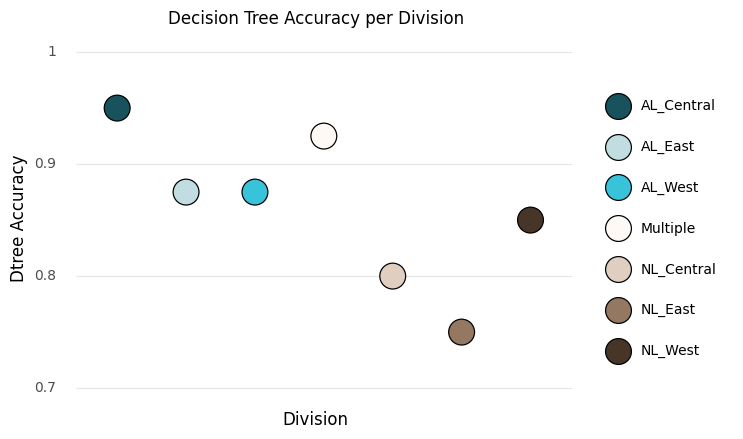

<ggplot: (8779710959068)>

In [319]:
(ggplot(DivDF, aes(x = "Division", y = "Accuracies", fill = "Division")) + 
 geom_point(color = "black", size = 10)+ 
 ylim(.70, 1) +
 labs(x = "Division", y = "Dtree Accuracy", fill = "") + 
 scale_fill_manual (["#18525C", "#C2DDE1", "#39C3DB","#FFF9F5", "#E0CFC1", "#947862" , "#473628" ]) +
theme_minimal() + 
 ggtitle("Decision Tree Accuracy per Division") +
theme(panel_grid_major_x = element_blank(),
      panel_grid_minor_y = element_blank(),
      axis_text_x = element_blank(),
      axis_text_y = element_text(size = 10),
      axis_title_x = element_text(size = 12),
      axis_title_y = element_text(size = 12),
      plot_title = element_text(size = 12),
      legend_text = element_text(size = 10)))

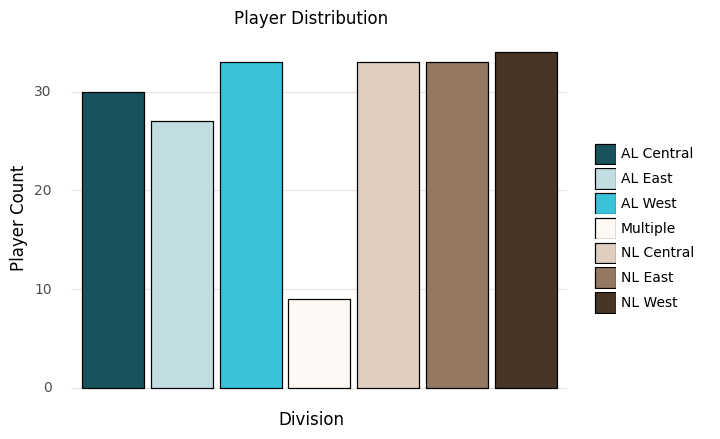

<ggplot: (8779713683978)>

In [486]:
(ggplot(data, aes(x = "Division", fill = "Division")) + 
geom_bar(color = "black") + 
 ggtitle("Player Distribution") +
labs(x = "Division", y = "Player Count", fill = "") +
scale_fill_manual (["#18525C", "#C2DDE1", "#39C3DB","#FFF9F5", "#E0CFC1", "#947862" , "#473628" ]) +
theme_minimal() + 
theme(panel_grid_major_x = element_blank(),
      panel_grid_minor_y = element_blank(),
      axis_text_x = element_blank(),
      axis_text_y = element_text(size = 10),
      axis_title_x = element_text(size = 12),
      axis_title_y = element_text(size = 12),
      plot_title = element_text(size = 12),
      legend_text = element_text(size = 10)))

### Answer

Yes, we can predict a player's division their team plays in based upon their continuous statistics. I was able to come to this conclusion because I made 7 different decision trees that were constructed based upon a player's continuous statistics and recorded each of their accuracies. With the accuracies representing that based upon the predictions, how many were actually right for predicting that player's division. With this, I compared each of the model's accuracies to one another to determine which divisions were the easiest to predict. This would show that a player in a given division has certain hitting statistics that classify them as unique compared to MLB, but also as a member of that division. This would show that based upon the pitchers that a hitter faces in their division, the hitters are all likelier to be similar in one way or another based upon their shared competition. Also, this is important for showing the skill levels of pitchers that a division holds. If all pitchers are similar in ability in a given division, it's likely that all hitters will perform relatively the same, whether good or bad. This would be shown in the divisions with higher accuracy scores as it would seemingly show that a model was able to be more accurate because the population of hitters in that division are relatively the same in ability. This is also important in determining possible outliers in divisions that would show that hitters in that division have some sort of "quirk" to them that can be attributed to outside factors like ballparks and pitcher skill.

# Question 3 - Which variables best explain the variance in OPS+ scores?

In [481]:
pcaData = pd.read_csv("https://raw.githubusercontent.com/jacksonjthomas/Parlett-Data-Science/main/ParlettFinalProject.csv")
pcaData.head()
pcaData["BB/SO"] = pcaData["BB"]/pcaData["SO"]
pcaData["ISO"] = pcaData["SLG"]-pcaData["BA"]
PCApredictors = [
                'R', 'H', 'Singles', 'Doubles', 
                'Triples', 'HR', 'XBH', 'RBI', 'SB',
               'CS', 'BB', 'SO', 'BA', 'OBP', 
               'SLG', 'OPS','TB', 'GDP', 'HBP',
                'SF', 'IBB', 'BB/SO', 'ISO']

comps = ["OPS+",
                'R', 'H', 'Singles', 'Doubles', 
                'Triples', 'HR', 'XBH', 'RBI', 'SB',
               'CS', 'BB', 'SO', 'BA', 'OBP', 
               'SLG', 'OPS','TB', 'GDP', 'HBP',
                'SF', 'IBB', 'BB/SO', 'ISO']


X2 = pcaData[PCApredictors]
z2 = StandardScaler()
zScored2 = z2.fit_transform(X2)
pcaData[PCApredictors] = zScored2
pcaData[reverseZscore] = pcaData[reverseZscore]*-1
pcaData.drop(['Name', 'Age', 'Nationality', 'Division', 'Position'], axis = 1)




,G,PA,AB,R,H,Singles,Doubles,Triples,HR,XBH,...,SLG,OPS,OPS+,TB,GDP,HBP,SF,IBB,BB/SO,ISO
0,162,735,681,1.426081,2.647051,2.901781,1.736674,3.241883,-0.650926,0.962276,...,-0.164524,-0.042485,111,1.478603,0.474083,-0.191472,0.168997,0.798278,-0.452880,-0.727590
1,156,702,647,2.583620,2.463202,1.489912,3.377571,0.608680,0.902708,2.494752,...,1.214014,1.119460,133,2.287667,0.474083,-0.410455,-0.704520,1.467150,-0.221719,0.717702
2,145,655,602,1.619004,2.316123,2.750509,0.726891,-0.269054,0.320095,0.562500,...,0.659602,0.864939,135,1.423439,-0.767265,-0.848421,0.168997,-0.873904,0.317190,-0.205195
3,155,698,614,1.667235,2.058735,1.187369,3.125126,-1.146789,0.999810,2.161605,...,1.214014,1.373981,140,1.956686,-0.146591,-0.848421,1.042514,-0.205031,0.876554,0.752528
4,160,702,640,1.281388,2.021965,1.641184,1.989120,2.364149,0.125891,1.495311,...,0.389888,0.411227,112,1.570542,1.715431,-0.410455,0.168997,1.132714,0.172306,0.038589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,105,439,380,0.027387,-1.471158,-2.140608,-1.040229,-0.269054,1.096912,0.162723,...,1.528680,1.196923,140,-0.286628,1.094757,-0.629438,-1.141279,-0.873904,-0.509051,2.197820
195,129,492,416,-0.792536,-1.471158,-1.232978,-0.914006,-0.269054,-0.748028,-1.036606,...,-1.228395,-0.983107,93,-1.316346,1.508539,0.246493,0.605756,-0.873904,0.203461,-0.640524
196,106,443,393,-0.985460,-1.471158,-1.535522,-1.040229,-0.707921,0.028789,-0.636830,...,-0.089603,-0.285940,111,-0.930202,-0.353483,-0.410455,-0.704520,-0.873904,0.319775,0.456505
197,121,411,359,-1.612460,-1.471158,-0.375772,-1.292674,-0.269054,-2.107457,-2.169306,...,-2.172394,-1.647076,66,-2.143799,0.267191,0.465476,1.042514,0.798278,0.408720,-2.364426


In [480]:
pca = PCA()
pca.fit(pcaData[PCApredictors])

pcaDF = pd.DataFrame({"expl_var" : pca.explained_variance_ratio_,  # percentage of variance method
                      "variable":np.tile(PCApredictors, 1), 
                      "cum_var": pca.explained_variance_ratio_.cumsum()}) # cumulative sum


In [482]:
pcaComp = PCA()
pcaComp.fit(pcaData[comps])
loadings = pd.DataFrame({"loading": pcaComp.components_.flatten(),
                         "comp": np.repeat(range(1,25), 24 ,axis=0),
                          "variable":np.tile(comps,24) })



loadings.head(24)
spliced = loadings[0:24]
spliced

,loading,comp,variable
0,9.936996e-01,1,OPS+
1,2.560453e-02,1,R
2,1.595505e-02,1,H
3,-6.896750e-07,1,Singles
4,1.392206e-02,1,Doubles
5,-6.844983e-04,1,Triples
6,3.157703e-02,1,HR
7,2.891262e-02,1,XBH
8,2.540363e-02,1,RBI
9,-4.423216e-03,1,SB


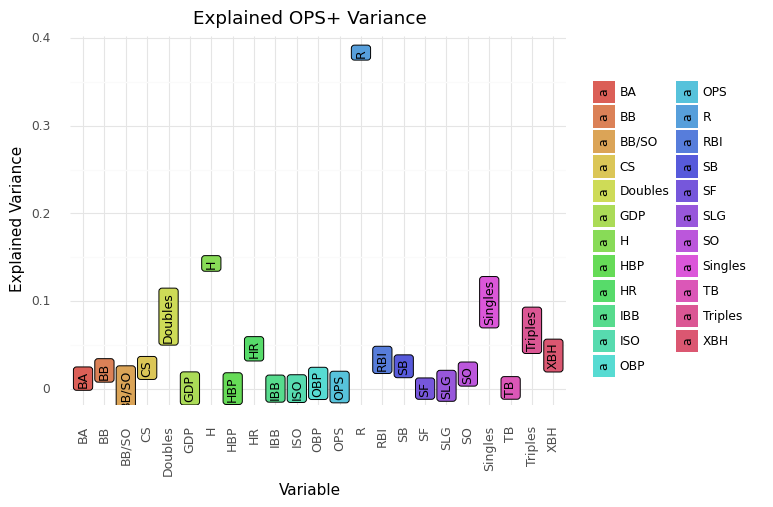

<ggplot: (8779710726382)>

In [483]:
(ggplot(pcaDF, aes(x = "variable", y = "expl_var", label = pcaDF["variable"], fill = "variable")) + 
geom_point() +
labs(x = "Variable", y = "Explained Variance", fill = "") +
ggtitle("Explained OPS+ Variance") +
geom_label(size = 9, angle = 90) +
theme_minimal() +
theme(axis_text_x = element_text(angle = 90, size = 9)))

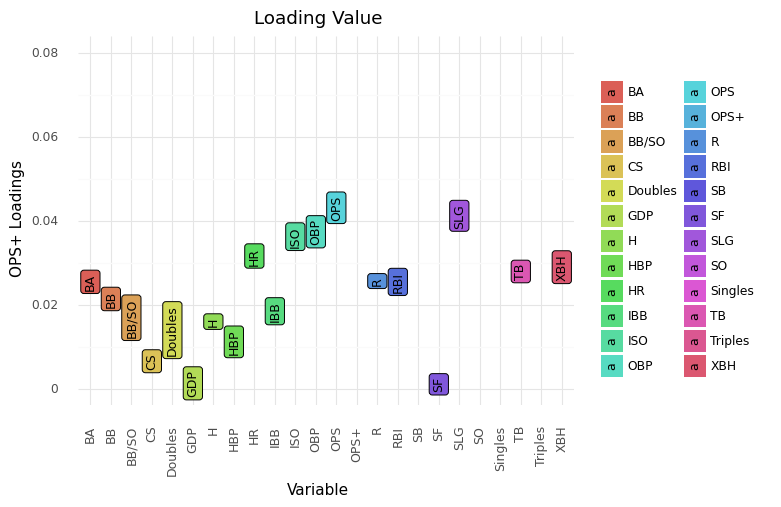

<ggplot: (8779711550901)>

In [484]:
(ggplot(spliced, aes(x = "variable", y = "loading", label = spliced["variable"], fill = "variable")) + 
geom_point() +
ylim(0,.08) +
labs(x = "Variable", y = "OPS+ Loadings", fill = "") +
ggtitle("Loading Value") +
geom_label(size = 9, angle = 90) +
theme_minimal() +
theme(axis_text_x = element_text(angle = 90, size = 9)))

### Answer 

I was able to conclude that Runs and Hits explain the most variance in relation to OPS+ scores. Additionally, I was able to conclude that SLG, OPS, ISO, and OBP are most correlated to the component of OPS+. How I was able to come to this conclusion was I ran PCA analysis which analyzes the relationship of each variable to one another in a data set. From this analysis, I was able to graph the explained variance levels for each variable in a bar chart. With the chart, you can see that Runs explains just under 40% of the variance in relation to finding OPS+. This would conclude that Runs alone can explain 40% of the information to an OPS+ score. Additionally, I calculated the loadings score for each component in relation to one another. This essentially acts a coefficient in a percentage that says "x variable is y% related to this component. From here we can figure out which variables impact what component the most. We can see that SLG, OPS, ISO, and OBP have the highest loading scores to OPS+. The significance of these conclusions is that we can figure out how to increase or decrease an OPS+ score and what characteristics in a hitter can lead to potentially higher OPS+ scores. Additionally, this is important in using as a reference to scouting out hitters across MLB Drafts, the Minor Leagues, and Internationally that can produce higher OPS+ scores.